### **Arbol de decisi√≥n para Regresi√≥n - Petroleo üôà**

#### Paso 1: Montaje de Librerias

In [1]:
### Librer√≠as b√°sicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Arbol de decisi√≥n
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

##Librer√≠as m√©tricas
from sklearn import metrics

##Evitar warnings
import warnings
warnings.filterwarnings('ignore')

##Modulo matem√°ticos
from scipy import stats

#### Incoporar data

In [2]:
gasolina = pd.read_csv("/content/petrol_consumption.csv")

gasolina.head()

Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410

In [3]:
### Summary
pd.options.display.float_format = '{:.3f}'.format
dataSumma = gasolina.describe().T
dataSumma

count     mean      std      min      25%  \
Petrol_tax                   48.000    7.668    0.951    5.000    7.000   
Average_income               48.000 4241.833  573.624 3063.000 3739.000   
Paved_Highways               48.000 5565.417 3491.507  431.000 3110.250   
Population_Driver_licence(%) 48.000    0.570    0.055    0.451    0.530   
Petrol_Consumption           48.000  576.771  111.886  344.000  509.500   

                                  50%      75%       max  
Petrol_tax                      7.500    8.125    10.000  
Average_income               4298.000 4578.750  5342.000  
Paved_Highways               4735.500 7156.000 17782.000  
Population_Driver_licence(%)    0.565    0.595     0.724  
Petrol_Consumption            568.500  632.750   968.000

In [4]:
## Revisi√≥n de ruido en los datos >=25% ruido sobre el total de la muestra
for k, v in gasolina.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 -1.5*irq)|(v >= q3 + 1.5 * irq)]
    porc = np.shape(v_col)[0] * 100/ np.shape(gasolina)[0]
    print("Columna %s ruido= %.2f%%" % (k, porc))

Columna Petrol_tax ruido= 4.17%
Columna Average_income ruido= 0.00%
Columna Paved_Highways ruido= 4.17%
Columna Population_Driver_licence(%) ruido= 2.08%
Columna Petrol_Consumption ruido= 4.17%


<Axes: >

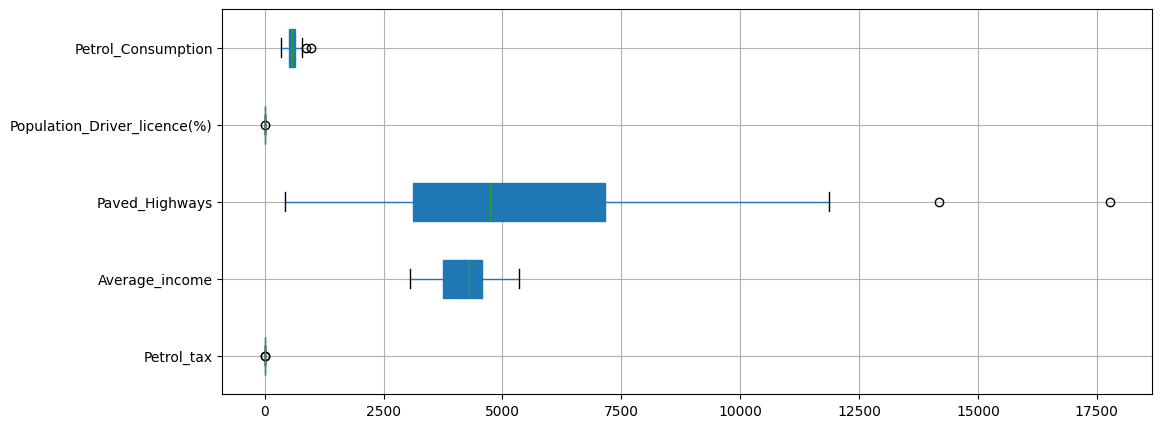

In [5]:
##Grafica ruido en los datos
plt.figure(figsize=(12,5))
gasolina.boxplot(patch_artist=True, vert=False)

In [6]:
###Correlaciones
correlacionGas = gasolina.corr(method='spearman').T
correlacionGas

Petrol_tax  Average_income  Paved_Highways  \
Petrol_tax                         1.000          -0.018          -0.462   
Average_income                    -0.018           1.000          -0.024   
Paved_Highways                    -0.462          -0.024           1.000   
Population_Driver_licence(%)      -0.349           0.206           0.022   
Petrol_Consumption                -0.531          -0.356           0.162   

                              Population_Driver_licence(%)  Petrol_Consumption  
Petrol_tax                                          -0.349              -0.531  
Average_income                                       0.206              -0.356  
Paved_Highways                                       0.022               0.162  
Population_Driver_licence(%)                         1.000               0.597  
Petrol_Consumption                                   0.597               1.000

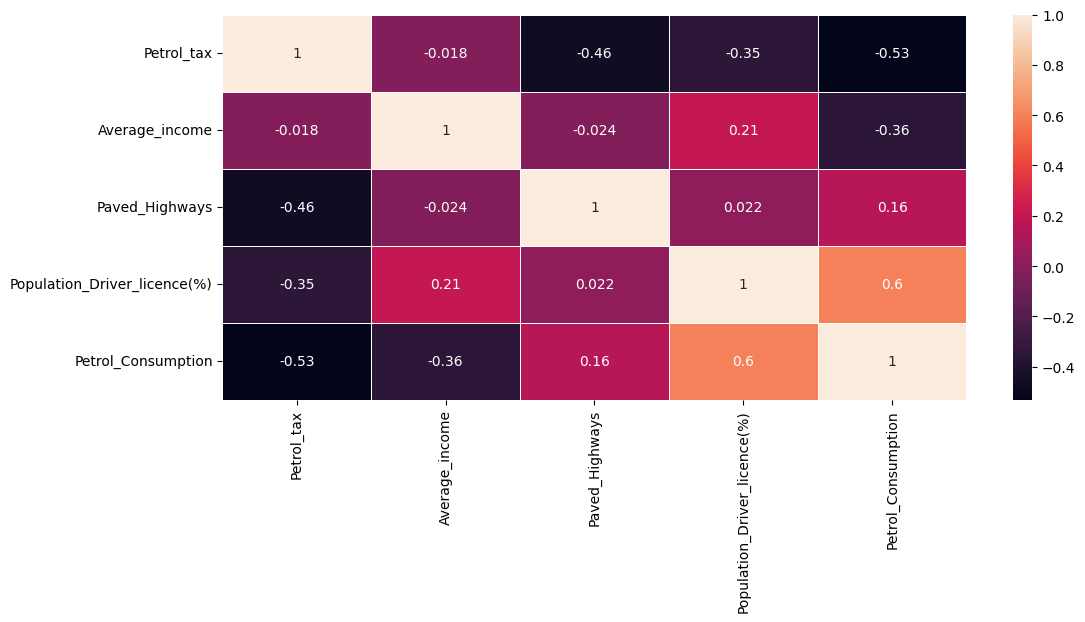

In [7]:
plt.figure(figsize=(12,5))
sns.heatmap(correlacionGas, linewidth=0.5, annot=True)
plt.show()

In [8]:
###grafica de visualizaci√≥n regresi√≥n
pearson_coef, p_value = stats.pearsonr(gasolina['Population_Driver_licence(%)'], gasolina['Petrol_Consumption'])
print("El coeficiente de correlaci√≥n de pearson es:", round(pearson_coef,2), "Con un valor de P de:", round(p_value,8))



El coeficiente de correlaci√≥n de pearson es: 0.7 Con un valor de P de: 3e-08


(0.0, 999.2)

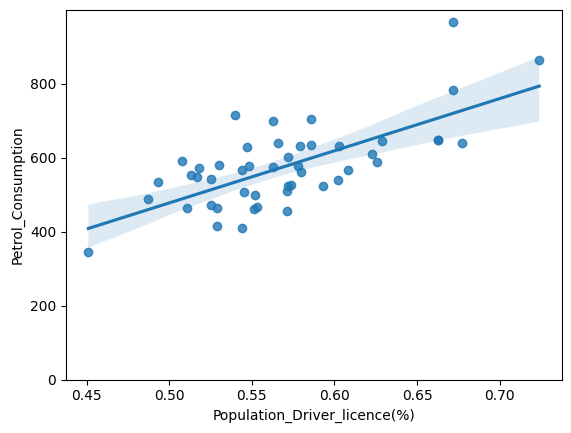

In [9]:
sns.regplot(x='Population_Driver_licence(%)', y='Petrol_Consumption', data=gasolina)
plt.ylim(0,)

<Axes: xlabel='Petrol_Consumption', ylabel='Density'>

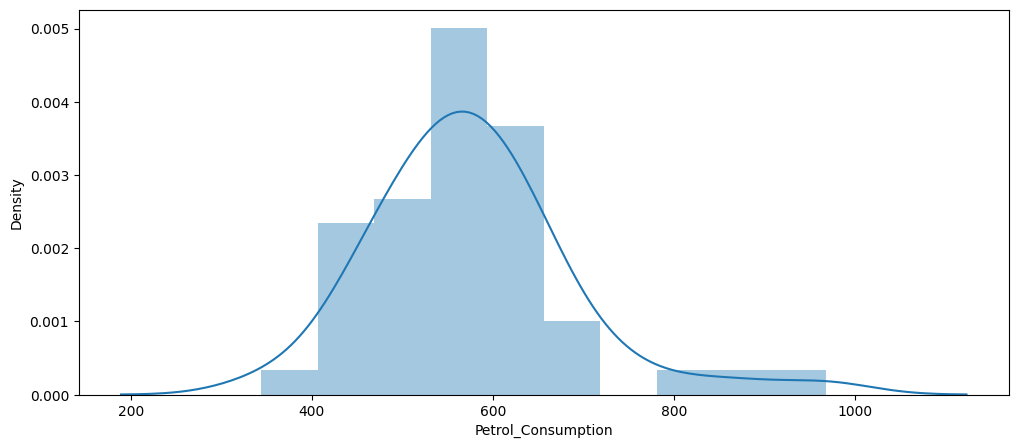

In [10]:
### Densidad e histograma sobre la variable y = petrol_consumption
plt.figure(figsize=(12,5))
sns.distplot(gasolina['Petrol_Consumption'])

#### Multigr√°ficas

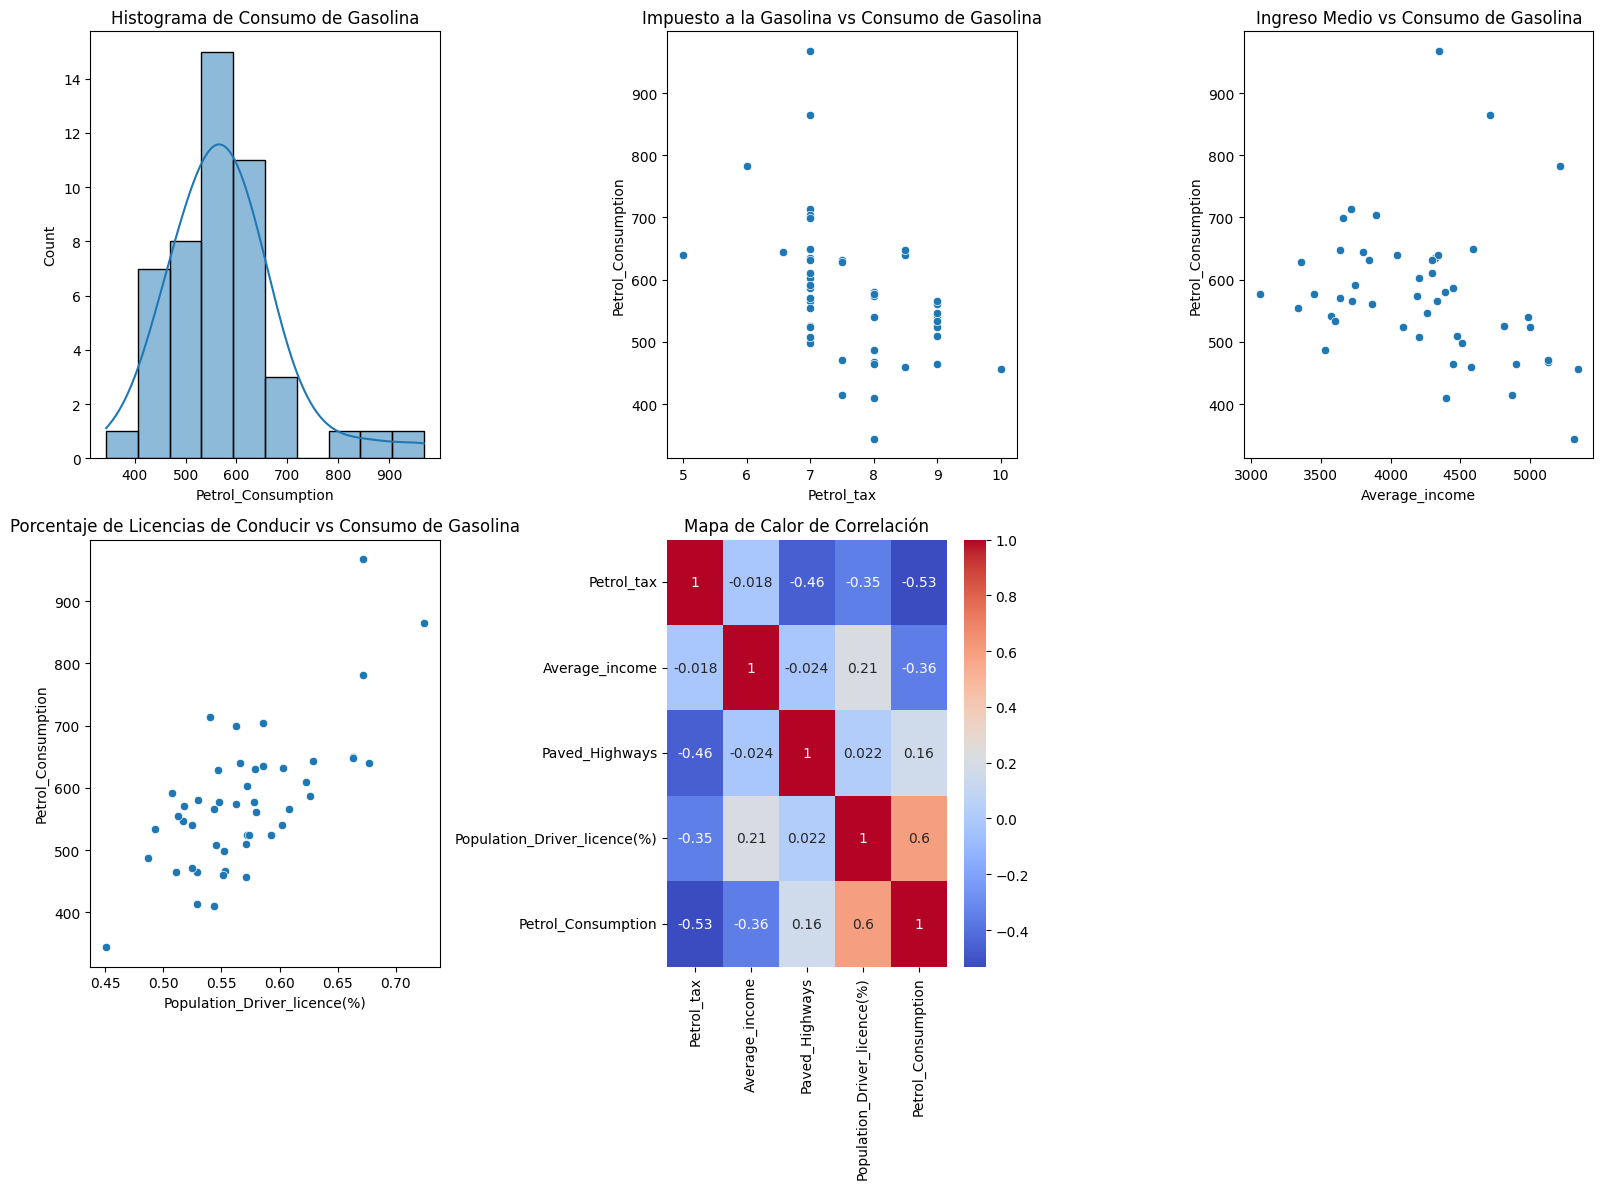

In [12]:
 #Creando las figuras
fig, axs = plt.subplots(2, 3, figsize=(16, 12))

# Histograma de Petrol Consumption
sns.histplot(gasolina['Petrol_Consumption'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Histograma de Consumo de Gasolina')

# Scatter plot de Petrol Tax vs Petrol Consumption
sns.scatterplot(x=gasolina['Petrol_tax'], y=gasolina['Petrol_Consumption'], ax=axs[0, 1])
axs[0, 1].set_title('Impuesto a la Gasolina vs Consumo de Gasolina')

# Scatter plot de Average Income vs Petrol Consumption
sns.scatterplot(x=gasolina['Average_income'], y=gasolina['Petrol_Consumption'], ax=axs[0, 2])
axs[0, 2].set_title('Ingreso Medio vs Consumo de Gasolina')

# Scatter plot de Population Driver Licence(%) vs Petrol Consumption
sns.scatterplot(x=gasolina['Population_Driver_licence(%)'], y=gasolina['Petrol_Consumption'], ax=axs[1, 0])
axs[1, 0].set_title('Porcentaje de Licencias de Conducir vs Consumo de Gasolina')

# Heatmap de correlaciones
corr_matrix = gasolina.corr(method="spearman")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axs[1, 1])
axs[1, 1].set_title('Mapa de Calor de Correlaci√≥n')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.delaxes(axs[1,2])  # Eliminar el subplot vac√≠o
plt.show()

Modelo Arbol de decisi√≥n - regresion

In [27]:
"""

"""
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preparar los datos
X = gasolina.drop('Petrol_Consumption', axis=1)  # Caracter√≠sticas
y = gasolina['Petrol_Consumption']               # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Crear el modelo de √°rbol de decisi√≥n para regresi√≥n
tree_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)

# Entrenar el modelo
tree_regressor.fit(X_train, y_train)

# Predecir el consumo de gasolina
y_pred = tree_regressor.predict(X_test)

# Calcular el error cuadr√°tico medio y el coeficiente de determinaci√≥n R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadr√°tico Medio (MSE): {mse}")
print(f"Coeficiente de Determinaci√≥n (R^2): {r2}")

# Si quieres ver la importancia de las caracter√≠sticas
feature_importance = pd.Series(tree_regressor.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nImportancia de las caracter√≠sticas:")
print(feature_importance)


Error Cuadr√°tico Medio (MSE): 9404.45375925926
Coeficiente de Determinaci√≥n (R^2): 0.5527381453884233

Importancia de las caracter√≠sticas:
Population_Driver_licence(%)   0.623
Average_income                 0.217
Petrol_tax                     0.085
Paved_Highways                 0.075
dtype: float64


In [28]:
# Seleccionar las caracter√≠sticas m√°s importantes
top_features = feature_importance[feature_importance > 0.1].index  # Por ejemplo, seleccionamos caracter√≠sticas con una importancia mayor a 0.1

# Reducir los conjuntos de datos a las caracter√≠sticas m√°s importantes
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

# Entrenar un nuevo modelo solo con las caracter√≠sticas m√°s importantes
tree_regressor_reduced = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_regressor_reduced.fit(X_train_reduced, y_train)

# Predecir el consumo de gasolina con el nuevo modelo
y_pred_reduced = tree_regressor_reduced.predict(X_test_reduced)

# Calcular el error cuadr√°tico medio y el coeficiente de determinaci√≥n R^2 para el nuevo modelo
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)
print(f"\nNuevo Error Cuadr√°tico Medio (MSE) con caracter√≠sticas reducidas: {mse_reduced}")
print(f"Nuevo Coeficiente de Determinaci√≥n (R^2) con caracter√≠sticas reducidas: {r2_reduced}")
print(f"Nuevo Error cuadr√°tico Medio (RMSE) con caracter√≠sticas reducidas:  {np.sqrt(mse_reduced)}")



Nuevo Error Cuadr√°tico Medio (MSE) con caracter√≠sticas reducidas: 8055.750703703704
Nuevo Coeficiente de Determinaci√≥n (R^2) con caracter√≠sticas reducidas: 0.6168804598055864
Nuevo Error cuadr√°tico Medio (RMSE) con caracter√≠sticas reducidas:  89.75383392203202


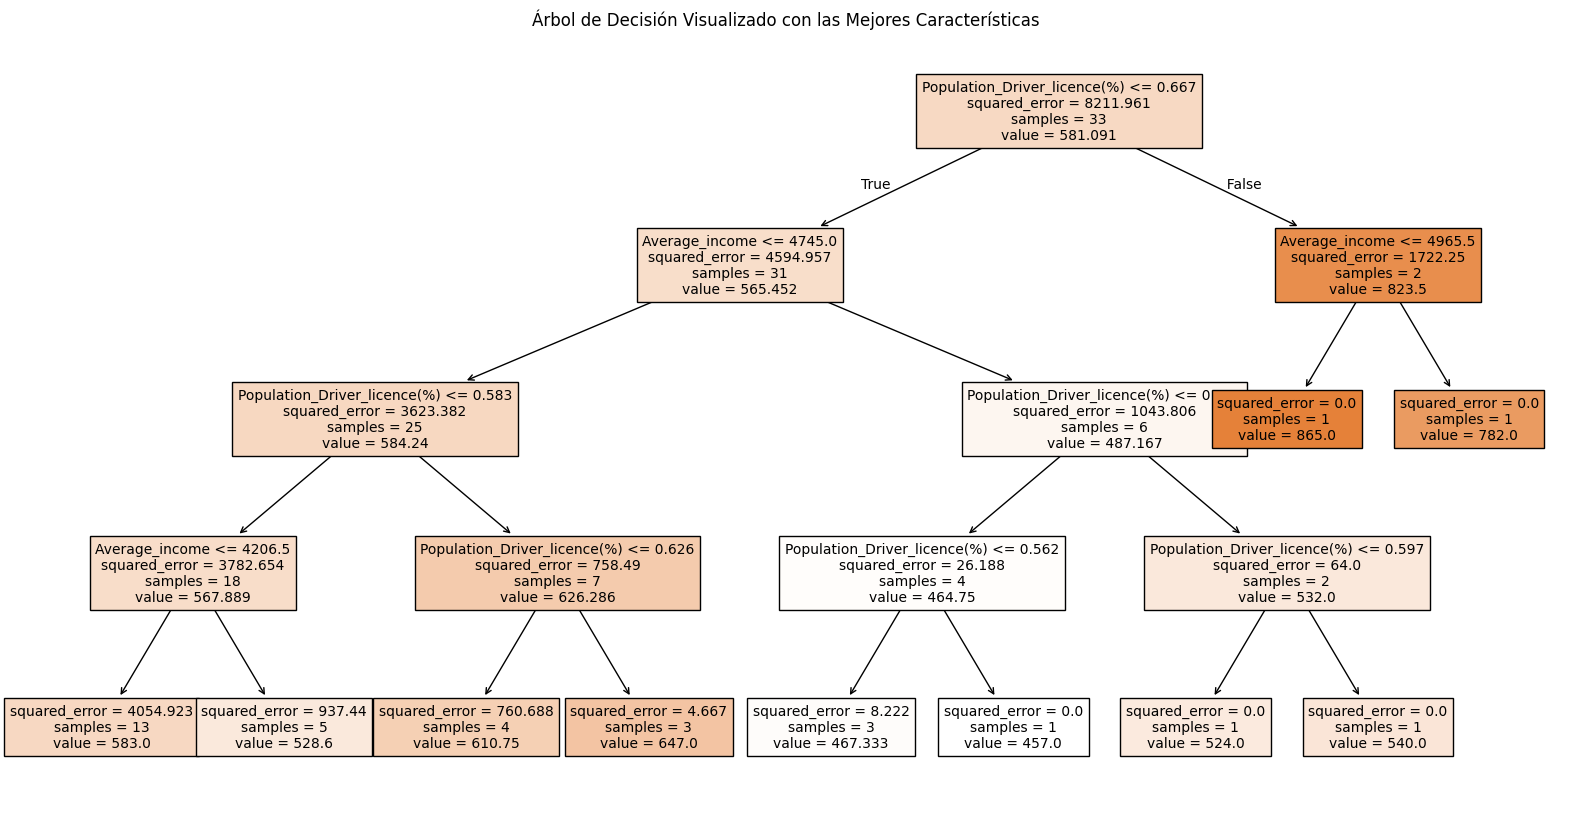

In [29]:
# Gr√°fico del √°rbol de decisi√≥n usando plot_tree
plt.figure(figsize=(20,10))
plot_tree(tree_regressor_reduced, filled=True, feature_names=top_features, fontsize=10)
plt.title("√Årbol de Decisi√≥n Visualizado con las Mejores Caracter√≠sticas")
plt.show()

In [31]:
###Mejores par√°metros
# Par√°metros para GridSearchCV
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear el modelo de √°rbol de decisi√≥n para regresi√≥n
tree_regressor = DecisionTreeRegressor(random_state=42)

# Aplicar GridSearchCV
grid_search = GridSearchCV(estimator=tree_regressor, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_reduced, y_train)

# Mejores par√°metros y mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores par√°metros:", best_params)
print("Mejor score (MSE):", best_score)

# Evaluar el modelo con los mejores par√°metros
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test_reduced)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE en conjunto de prueba:", mse)
print("R^2 en conjunto de prueba:", r2)

Mejores par√°metros: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Mejor score (MSE): -59.127501524530544
MSE en conjunto de prueba: 8814.047685185187
R^2 en conjunto de prueba: 0.5808169814828983


In [33]:
##Modelo con mejores caracter√≠sticas y mejores par√°metros
# Definir los mejores hiperpar√°metros encontrados previamente
best_params = {
    'max_depth': 8,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'sqrt'
}

# Entrenar el modelo con las mejores caracter√≠sticas y mejores hiperpar√°metros
best_tree_regressor = DecisionTreeRegressor(**best_params, random_state=42)
best_tree_regressor.fit(X_train_reduced, y_train)

# Predicci√≥n y evaluaci√≥n
y_pred_reduced = best_tree_regressor.predict(X_test_reduced)
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

print("MSE con mejores caracter√≠sticas e hiperpar√°metros:", mse_reduced)
print("R^2 con mejores caracter√≠sticas e hiperpar√°metros:", r2_reduced)

MSE con mejores caracter√≠sticas e hiperpar√°metros: 8814.047685185187
R^2 con mejores caracter√≠sticas e hiperpar√°metros: 0.5808169814828983


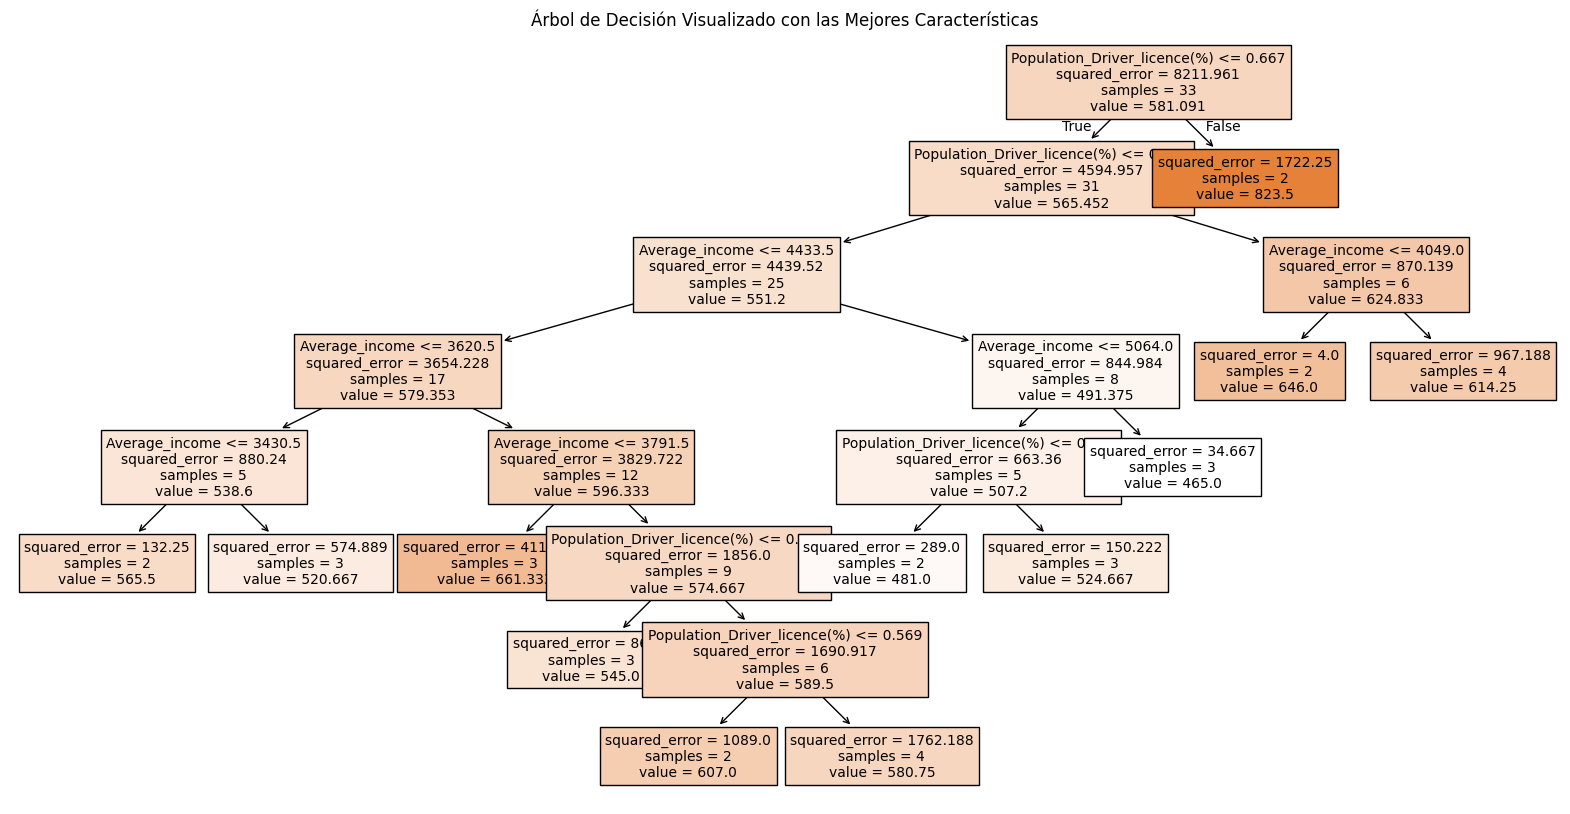

In [34]:
# Gr√°fico del √°rbol de decisi√≥n usando plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_tree_regressor, filled=True, feature_names=top_features, fontsize=10)
plt.title("√Årbol de Decisi√≥n Visualizado con las Mejores Caracter√≠sticas")
plt.show()

Regresi√≥n Multiple para Consumo de Petroleo

In [35]:
# Creaci√≥n del modelo de regresi√≥n lineal - (normalizada mejora el modelo , %licencia)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelo = LinearRegression()
modelo.fit(X_train_reduced, y_train)

# Predicci√≥n con los datos de prueba
y_pred = modelo.predict(X_test_reduced)

# C√°lculo de MSE y RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# C√°lculo de R^2
r2 = round(r2_score(y_test, y_pred),3)

# Mostrar las m√©tricas
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 8001.49152384616
Root Mean Squared Error (RMSE): 89.4510565831738
R^2 Score: 0.619


In [20]:
#!pip install scikit-optimize

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 107.8/107.8 kB 7.2 MB/s eta 0:00:00


## Mejora con Hiperparametrizaci√≥n Bayesiana

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from skopt import BayesSearchCV
from skopt.space import Real, Integer


# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

# Definir los modelos a probar
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# Definir los espacios de b√∫squeda para cada modelo
search_spaces = {
    'Ridge': {
        'alpha': Real(1e-6, 100, prior='log-uniform'),
        'fit_intercept': [True, False],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    },
    'Lasso': {
        'alpha': Real(1e-6, 100, prior='log-uniform'),
        'fit_intercept': [True, False],
        'selection': ['cyclic', 'random']
    },
    'ElasticNet': {
        'alpha': Real(1e-6, 100, prior='log-uniform'),
        'l1_ratio': Real(0, 1),
        'fit_intercept': [True, False],
        'selection': ['cyclic', 'random']
    }
}

# Resultados para cada modelo
results = {}

# Ejecutar optimizaci√≥n bayesiana para cada modelo
for model_name, model in models.items():
    print(f"\nOptimizando {model_name}...")

    # Configurar la b√∫squeda bayesiana
    opt = BayesSearchCV(
        model,
        search_spaces[model_name],
        n_iter=20,  # N√∫mero de iteraciones
        cv=10,       # Validaci√≥n cruzada de 10 pliegues
        n_jobs=-1,  # Usar todos los n√∫cleos disponibles
        random_state=42,
        scoring='neg_mean_squared_error'
    )

    # Ajustar el modelo
    opt.fit(X_train_scaled, y_train)

    # Obtener el mejor modelo
    best_model = opt.best_estimator_

    # Predecir con los datos de prueba
    y_pred = best_model.predict(X_test_scaled)

    # Calcular m√©tricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = round(r2_score(y_test, y_pred), 3)

    # Guardar resultados
    results[model_name] = {
        'best_params': opt.best_params_,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

    # Mostrar resultados
    print(f"\nMejores hiperpar√°metros para {model_name}:")
    for param, value in opt.best_params_.items():
        print(f"  {param}: {value}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")

# Encontrar el mejor modelo
best_model_name = max(results, key=lambda x: results[x]['r2'])
print("\n" + "="*50)
print(f"El mejor modelo es {best_model_name} con R¬≤ = {results[best_model_name]['r2']}")
print("="*50)


Optimizando Ridge...

Mejores hiperpar√°metros para Ridge:
  alpha: 0.31946389055401536
  fit_intercept: True
  solver: lsqr
Mean Squared Error (MSE): 8079.912840440266
Root Mean Squared Error (RMSE): 89.88833539698166
R^2 Score: 0.616

Optimizando Lasso...

Mejores hiperpar√°metros para Lasso:
  alpha: 1e-06
  fit_intercept: True
  selection: random
Mean Squared Error (MSE): 8001.491678204421
Root Mean Squared Error (RMSE): 89.45105744598227
R^2 Score: 0.619

Optimizando ElasticNet...

Mejores hiperpar√°metros para ElasticNet:
  alpha: 1.0000590600469685
  fit_intercept: True
  l1_ratio: 1.0
  selection: cyclic
Mean Squared Error (MSE): 8159.983463705078
Root Mean Squared Error (RMSE): 90.3326267951125
R^2 Score: 0.612

El mejor modelo es Lasso con R¬≤ = 0.619


### Mejora con Hiperparametrizaci√≥n GridSearchCV

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Definir los modelos a probar
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# Definir los espacios de b√∫squeda para cada modelo (versi√≥n para GridSearchCV)
search_spaces = {
    'Ridge': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
        'fit_intercept': [True, False],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    },
    'Lasso': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
        'fit_intercept': [True, False],
        'selection': ['cyclic', 'random']
    },
    'ElasticNet': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'fit_intercept': [True, False],
        'selection': ['cyclic', 'random']
    }
}

# Resultados para cada modelo
results = {}

# Ejecutar GridSearchCV para cada modelo
for model_name, model in models.items():
    print(f"\nOptimizando {model_name}...")

    # Configurar la b√∫squeda de cuadr√≠cula
    grid_search = GridSearchCV(
        model,
        search_spaces[model_name],
        cv=10,       # Validaci√≥n cruzada de 10 pliegues
        n_jobs=-1,  # Usar todos los n√∫cleos disponibles
        scoring='neg_mean_squared_error',
        verbose=1
    )

    # Ajustar el modelo
    grid_search.fit(X_train_scaled, y_train)

    # Obtener el mejor modelo
    best_model = grid_search.best_estimator_

    # Predecir con los datos de prueba
    y_pred = best_model.predict(X_test_scaled)

    # Calcular m√©tricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = round(r2_score(y_test, y_pred), 3)

    # Guardar resultados
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

    # Mostrar resultados
    print(f"\nMejores hiperpar√°metros para {model_name}:")
    for param, value in grid_search.best_params_.items():
        print(f"  {param}: {value}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")

# Encontrar el mejor modelo
best_model_name = max(results, key=lambda x: results[x]['r2'])
print("\n" + "="*50)
print(f"El mejor modelo es {best_model_name} con R¬≤ = {results[best_model_name]['r2']}")
print("="*50)

# Comparaci√≥n con el modelo de regresi√≥n lineal original
from sklearn.linear_model import LinearRegression
modelo_original = LinearRegression()
modelo_original.fit(X_train_scaled, y_train)
y_pred_original = modelo_original.predict(X_test_scaled)
mse_original = mean_squared_error(y_test, y_pred_original)
rmse_original = np.sqrt(mse_original)
r2_original = round(r2_score(y_test, y_pred_original), 3)

print("\nModelo original (LinearRegression):")
print(f"Mean Squared Error (MSE): {mse_original}")
print(f"Root Mean Squared Error (RMSE): {rmse_original}")
print(f"R^2 Score: {r2_original}")
print(f"Mejora en R¬≤ respecto al mejor modelo: {results[best_model_name]['r2'] - r2_original}")


Optimizando Ridge...
Fitting 10 folds for each of 98 candidates, totalling 980 fits

Mejores hiperpar√°metros para Ridge:
  alpha: 0.01
  fit_intercept: True
  solver: saga
Mean Squared Error (MSE): 8004.197122953402
Root Mean Squared Error (RMSE): 89.46617865402212
R^2 Score: 0.619

Optimizando Lasso...
Fitting 10 folds for each of 28 candidates, totalling 280 fits

Mejores hiperpar√°metros para Lasso:
  alpha: 0.0001
  fit_intercept: True
  selection: cyclic
Mean Squared Error (MSE): 8001.506933560709
Root Mean Squared Error (RMSE): 89.45114271802629
R^2 Score: 0.619

Optimizando ElasticNet...
Fitting 10 folds for each of 140 candidates, totalling 1400 fits

Mejores hiperpar√°metros para ElasticNet:
  alpha: 0.01
  fit_intercept: True
  l1_ratio: 0.1
  selection: random
Mean Squared Error (MSE): 8074.54718717019
Root Mean Squared Error (RMSE): 89.85848422475304
R^2 Score: 0.616

El mejor modelo es Ridge con R¬≤ = 0.619

Modelo original (LinearRegression):
Mean Squared Error (MSE): 8

### Mejora con Modelo OLS con RFE de caracter√≠sticas e Hiperpar√°metros

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFECV


# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

print("=== Modelo OLS con statsmodels ===")

# A√±adir constante para el t√©rmino de intercepci√≥n
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

# Ajustar el modelo OLS
ols_model = sm.OLS(y_train, X_train_sm).fit(cov_type='HC3')

# Mostrar resumen del modelo
print(ols_model.summary())

# Predecir con los datos de prueba
y_pred_ols = ols_model.predict(X_test_sm)

# Calcular m√©tricas
mse_ols = mean_squared_error(y_test, y_pred_ols)
rmse_ols = np.sqrt(mse_ols)
r2_ols = round(r2_score(y_test, y_pred_ols), 3)

print(f"\nMean Squared Error (MSE): {mse_ols}")
print(f"Root Mean Squared Error (RMSE): {rmse_ols}")
print(f"R^2 Score: {r2_ols}")

# Ahora vamos a optimizar el modelo OLS usando selecci√≥n de caracter√≠sticas
print("\n=== Optimizaci√≥n de OLS con selecci√≥n de caracter√≠sticas ===")

# Usar RFECV para selecci√≥n de caracter√≠sticas
estimator = LinearRegression()
selector = RFECV(estimator, step=1, cv=10, scoring='neg_mean_squared_error')
selector.fit(X_train_scaled, y_train)

# Obtener las caracter√≠sticas seleccionadas
X_train_selected = X_train_scaled[:, selector.support_]
X_test_selected = X_test_scaled[:, selector.support_]

print(f"Caracter√≠sticas seleccionadas: {selector.support_}")
print(f"N√∫mero √≥ptimo de caracter√≠sticas: {selector.n_features_}")

# A√±adir constante para el t√©rmino de intercepci√≥n
X_train_selected_sm = sm.add_constant(X_train_selected)
X_test_selected_sm = sm.add_constant(X_test_selected)

# Ajustar el modelo OLS con las caracter√≠sticas seleccionadas
ols_optimized = sm.OLS(y_train, X_train_selected_sm).fit(cov_type='HC3')

# Mostrar resumen del modelo optimizado
print(ols_optimized.summary())

# Predecir con los datos de prueba
y_pred_ols_opt = ols_optimized.predict(X_test_selected_sm)

# Calcular m√©tricas
mse_ols_opt = mean_squared_error(y_test, y_pred_ols_opt)
rmse_ols_opt = np.sqrt(mse_ols_opt)
r2_ols_opt = round(r2_score(y_test, y_pred_ols_opt), 3)

print(f"\nMean Squared Error (MSE): {mse_ols_opt}")
print(f"Root Mean Squared Error (RMSE): {rmse_ols_opt}")
print(f"R^2 Score: {r2_ols_opt}")

# Comparar con los modelos anteriores
print("\n=== Comparaci√≥n de modelos ===")
print(f"OLS b√°sico: R¬≤ = {r2_ols}, RMSE = {rmse_ols}")
print(f"OLS optimizado: R¬≤ = {r2_ols_opt}, RMSE = {rmse_ols_opt}")

# Modelo de regresi√≥n lineal de sklearn para comparaci√≥n
modelo_original = LinearRegression()
modelo_original.fit(X_train_scaled, y_train)
y_pred_original = modelo_original.predict(X_test_scaled)
mse_original = mean_squared_error(y_test, y_pred_original)
rmse_original = np.sqrt(mse_original)
r2_original = round(r2_score(y_test, y_pred_original), 3)

print(f"LinearRegression (sklearn): R¬≤ = {r2_original}, RMSE = {rmse_original}")

=== Modelo OLS con statsmodels ===
                            OLS Regression Results                            
Dep. Variable:     Petrol_Consumption   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     11.01
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           0.000260
Time:                        14:59:09   Log-Likelihood:                -181.15
No. Observations:                  33   AIC:                             368.3
Df Residuals:                      30   BIC:                             372.8
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        581.

### Modelo de Regresi√≥n de Procesos Gaussianos GPR

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, Matern, WhiteKernel
import matplotlib.pyplot as plt
import seaborn as sns

# Para simular X_train_reduced y X_test_reduced
X_train_reduced = X_train
X_test_reduced = X_test

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

print("=== Modelo de Regresi√≥n de Procesos Gaussianos (GPR) ===")

# Definir diferentes kernels para probar
kernels = {
    'RBF': RBF(),
    'Matern': Matern(),
    'RBF+WhiteNoise': RBF() + WhiteKernel(),
    'Matern+WhiteNoise': Matern() + WhiteKernel(),
    'ConstantKernel*RBF': ConstantKernel() * RBF()
}

# Resultados para cada kernel
results_gpr = {}

# Probar cada kernel
for kernel_name, kernel in kernels.items():
    print(f"\nEntrenando GPR con kernel {kernel_name}...")

    # Crear y entrenar el modelo GPR
    gpr = GaussianProcessRegressor(
        kernel=kernel,
        n_restarts_optimizer=10,
        random_state=42
    )

    # Ajustar el modelo
    gpr.fit(X_train_scaled, y_train)

    # Predecir con los datos de prueba (incluye desviaci√≥n est√°ndar)
    y_pred_mean, y_pred_std = gpr.predict(X_test_scaled, return_std=True)

    # Calcular m√©tricas
    mse = mean_squared_error(y_test, y_pred_mean)
    rmse = np.sqrt(mse)
    r2 = round(r2_score(y_test, y_pred_mean), 3)

    # Guardar resultados
    results_gpr[kernel_name] = {
        'kernel': kernel,
        'model': gpr,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'y_pred_mean': y_pred_mean,
        'y_pred_std': y_pred_std
    }

    # Mostrar resultados
    print(f"Kernel: {kernel_name}")
    print(f"Kernel optimizado: {gpr.kernel_}")
    print(f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta)}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")

# Encontrar el mejor modelo GPR
best_gpr_name = max(results_gpr, key=lambda x: results_gpr[x]['r2'])
best_gpr = results_gpr[best_gpr_name]

print("\n" + "="*50)
print(f"El mejor modelo GPR es {best_gpr_name} con R¬≤ = {best_gpr['r2']}")
print("="*50)

# Visualizar predicciones con intervalos de confianza para el mejor modelo
plt.figure(figsize=(12, 6))
plt.errorbar(range(len(y_test)),
             best_gpr['y_pred_mean'],
             yerr=1.96*best_gpr['y_pred_std'],
             fmt='o',
             alpha=0.5,
             label='Predicci√≥n GPR con IC 95%')
plt.plot(range(len(y_test)), y_test, 'ro', label='Valores reales')
plt.xlabel('√çndice de muestra')
plt.ylabel('Valor objetivo')
plt.title(f'Predicciones GPR con {best_gpr_name} e intervalos de confianza')
plt.legend()
plt.grid(True)
plt.savefig('gpr_predicciones_intervalos.png')
plt.close()

# Gr√°fico de residuos vs valores ajustados
residuos_gpr = y_test - best_gpr['y_pred_mean']
plt.figure(figsize=(10, 6))
plt.scatter(best_gpr['y_pred_mean'], residuos_gpr)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores predichos (GPR)')
plt.grid(True)
plt.savefig('gpr_residuos_vs_predichos.png')
plt.close()

# Histograma de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos_gpr, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de residuos (GPR)')
plt.grid(True)
plt.savefig('gpr_histograma_residuos.png')
plt.close()

# QQ plot para verificar normalidad
from scipy import stats
plt.figure(figsize=(10, 6))
stats.probplot(residuos_gpr, dist="norm", plot=plt)
plt.title('QQ Plot de residuos (GPR)')
plt.grid(True)
plt.savefig('gpr_qq_plot_residuos.png')
plt.close()

# Optimizaci√≥n de hiperpar√°metros con GridSearchCV para el mejor kernel
print("\n=== Optimizaci√≥n de hiperpar√°metros para GPR ===")

# Crear un nuevo GPR con el mejor kernel
best_kernel_class = type(best_gpr['kernel'])
if best_kernel_class == type(RBF()):
    # Definir el espacio de b√∫squeda para RBF
    param_grid = {
        "alpha": [1e-10, 1e-8, 1e-6, 1e-4],
        "kernel__length_scale": np.logspace(-2, 2, 5)
    }
    gpr_opt = GaussianProcessRegressor(kernel=RBF(), random_state=42)
elif best_kernel_class == type(Matern()):
    # Definir el espacio de b√∫squeda para Matern
    param_grid = {
        "alpha": [1e-10, 1e-8, 1e-6, 1e-4],
        "kernel__length_scale": np.logspace(-2, 2, 5),
        "kernel__nu": [0.5, 1.5, 2.5]
    }
    gpr_opt = GaussianProcessRegressor(kernel=Matern(), random_state=42)
else:
    # Para kernels compuestos, usar un enfoque m√°s simple
    param_grid = {
        "alpha": [1e-10, 1e-8, 1e-6, 1e-4],
        "normalize_y": [True, False]
    }
    gpr_opt = GaussianProcessRegressor(kernel=best_gpr['kernel'], random_state=42)

# Realizar GridSearchCV
grid_search = GridSearchCV(
    gpr_opt,
    param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

# Obtener el mejor modelo
best_gpr_opt = grid_search.best_estimator_

# Predecir con los datos de prueba
y_pred_opt_mean, y_pred_opt_std = best_gpr_opt.predict(X_test_scaled, return_std=True)

# Calcular m√©tricas
mse_opt = mean_squared_error(y_test, y_pred_opt_mean)
rmse_opt = np.sqrt(mse_opt)
r2_opt = round(r2_score(y_test, y_pred_opt_mean), 3)

print(f"\nMejores hiperpar√°metros: {grid_search.best_params_}")
print(f"Kernel optimizado: {best_gpr_opt.kernel_}")
print(f"Mean Squared Error (MSE): {mse_opt}")
print(f"Root Mean Squared Error (RMSE): {rmse_opt}")
print(f"R^2 Score: {r2_opt}")

# Comparaci√≥n con modelos anteriores
print("\n=== Comparaci√≥n con modelos anteriores ===")
print(f"GPR optimizado: R¬≤ = {r2_opt}, RMSE = {rmse_opt}")
print(f"GPR mejor kernel: R¬≤ = {best_gpr['r2']}, RMSE = {best_gpr['rmse']}")

# Modelo OLS para comparaci√≥n
from sklearn.linear_model import LinearRegression
modelo_original = LinearRegression()
modelo_original.fit(X_train_scaled, y_train)
y_pred_original = modelo_original.predict(X_test_scaled)
mse_original = mean_squared_error(y_test, y_pred_original)
rmse_original = np.sqrt(mse_original)
r2_original = round(r2_score(y_test, y_pred_original), 3)

print(f"LinearRegression (sklearn): R¬≤ = {r2_original}, RMSE = {rmse_original}")

# Visualizar predicciones con intervalos de confianza para el modelo optimizado
plt.figure(figsize=(12, 6))
plt.errorbar(range(len(y_test)),
             y_pred_opt_mean,
             yerr=1.96*y_pred_opt_std,
             fmt='o',
             alpha=0.5,
             label='Predicci√≥n GPR optimizado con IC 95%')
plt.plot(range(len(y_test)), y_test, 'ro', label='Valores reales')
plt.xlabel('√çndice de muestra')
plt.ylabel('Valor objetivo')
plt.title('Predicciones GPR optimizado con intervalos de confianza')
plt.legend()
plt.grid(True)
plt.savefig('gpr_opt_predicciones_intervalos.png')
plt.close()

# Comparar incertidumbre entre modelos
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), best_gpr['y_pred_std'], 'b-', label=f'Incertidumbre {best_gpr_name}')
plt.plot(range(len(y_test)), y_pred_opt_std, 'r-', label='Incertidumbre GPR optimizado')
plt.xlabel('√çndice de muestra')
plt.ylabel('Desviaci√≥n est√°ndar')
plt.title('Comparaci√≥n de incertidumbre entre modelos GPR')
plt.legend()
plt.grid(True)
plt.savefig('gpr_comparacion_incertidumbre.png')
plt.close()

=== Modelo de Regresi√≥n de Procesos Gaussianos (GPR) ===

Entrenando GPR con kernel RBF...
Kernel: RBF
Kernel optimizado: RBF(length_scale=1.17)
Log-likelihood: -1941518.0274861928
Mean Squared Error (MSE): 15184.348019634965
Root Mean Squared Error (RMSE): 123.22478654732969
R^2 Score: 0.278

Entrenando GPR con kernel Matern...
Kernel: Matern
Kernel optimizado: Matern(length_scale=2.16, nu=1.5)
Log-likelihood: -1045718.1729740846
Mean Squared Error (MSE): 7125.893187483015
Root Mean Squared Error (RMSE): 84.41500570090021
R^2 Score: 0.661

Entrenando GPR con kernel RBF+WhiteNoise...
Kernel: RBF+WhiteNoise
Kernel optimizado: RBF(length_scale=1e+05) + WhiteKernel(noise_level=1e+05)
Log-likelihood: -277.3399968571129
Mean Squared Error (MSE): 342600.75040620787
Root Mean Squared Error (RMSE): 585.3210660878419
R^2 Score: -15.294

Entrenando GPR con kernel Matern+WhiteNoise...
Kernel: Matern+WhiteNoise
Kernel optimizado: Matern(length_scale=1e+05, nu=1.5) + WhiteKernel(noise_level=1e+05)